## Redes Neurais Artificiais 2020.1

**Disciplina**: Redes Neurais Artificiais 2020.1  
**Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
**Github**: http://github.com/elloa  

**Alunos**: Lucas da Silva Lima 1515080170, Rafael Barbosa de Carvalho 1315080337.
        

Levando em conta a base de dados **_Forest Cover Type_**, esta terceira parte do Projeto Prático 3 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Testando Redes Neurais sem os Atributos Categórios

1. Abra a base de dados em questão
2. Elimine todas as colunas relativas aos atributos categóricos
3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória
5. Efetue o escalonamento dos atributos

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando-se todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.


### Continuando

5. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    5.1 Utilize a função de ativação ReLU  
    5.2 Utilize o solver Adam    
    5.3 Imprima o passo a passo do treinamento    
    5.4 Utilize o número máximo de épocas igual a 300  
6. Com o modelo em questão, após o treinamento, apresente:  
    6.1 Matriz de confusão para o conjunto de teste  
    6.2 Acurácia  
    6.3 F-Score  
    6.4 Precisão  
    6.5 Revocação  
7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes  
    7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
8. Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD  
    8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
9. Houve influência da escolha do otimizador no desempenho da rede?

In [2]:
## Reservado para a importação de bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

In [3]:
#1 acessando a base
csvFile = pd.read_csv("data/covtype.csv")
df = pd.DataFrame(csvFile)    

In [11]:
#2 elimando colunas relativo atributos categóricos
columns = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3','Wilderness_Area4']
for i in range(1,41):
    soil = 'Soil_Type'+str(i)
    columns.append(soil)
    soil = '' 


df.drop(columns, axis='columns', inplace=True)



In [4]:
#3
array = df.to_numpy() # retorna uma matriz numpy

x = array[...,0:array.shape[1]-1] # atributos preditores
y = array[...,array.shape[1]-1]  # -> y[y0,y1,y2]
# y = array[...,array.shape[1]-1: ]  # -> y[[y0],[y1],[y2]] 



In [13]:
##### 4
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)
# função que divide o conjunto de teste 70/30 de forma aleatoria, tanto para x, quanto para y, porem mantendo a correspondencia

In [126]:
# 5
scaler_x_train = StandardScaler()
# scaler_y_train = StandardScaler()

x_train_transformed = scaler_x_train.fit_transform(x_train)
# escalonando para o treino
neuralNetwork = MLPClassifier(hidden_layer_sizes=(10), activation="relu", solver="adam", random_state=1, max_iter=300, learning_rate_init=0.01,verbose="true",).fit(x_train_transformed, y_train)


Iteration 1, loss = 0.71808092
Iteration 2, loss = 0.67595445
Iteration 3, loss = 0.67311105
Iteration 4, loss = 0.66994049
Iteration 5, loss = 0.66590044
Iteration 6, loss = 0.66421958
Iteration 7, loss = 0.66312249
Iteration 8, loss = 0.65998837
Iteration 9, loss = 0.65699921
Iteration 10, loss = 0.65622794
Iteration 11, loss = 0.65581755
Iteration 12, loss = 0.65552565
Iteration 13, loss = 0.65546065
Iteration 14, loss = 0.65545714
Iteration 15, loss = 0.65467470
Iteration 16, loss = 0.65539454
Iteration 17, loss = 0.65499494
Iteration 18, loss = 0.65500415
Iteration 19, loss = 0.65437155
Iteration 20, loss = 0.65445697
Iteration 21, loss = 0.65436594
Iteration 22, loss = 0.65476380
Iteration 23, loss = 0.65444843
Iteration 24, loss = 0.65437165
Iteration 25, loss = 0.65413838
Iteration 26, loss = 0.65432008
Iteration 27, loss = 0.65436328
Iteration 28, loss = 0.65409766
Iteration 29, loss = 0.65426721
Iteration 30, loss = 0.65436115
Iteration 31, loss = 0.65383174
Iteration 32, los

Acurácia = 0.7175 
F-Score = 0.5415
Revocação = 0.5275
Precisão = 0.6307


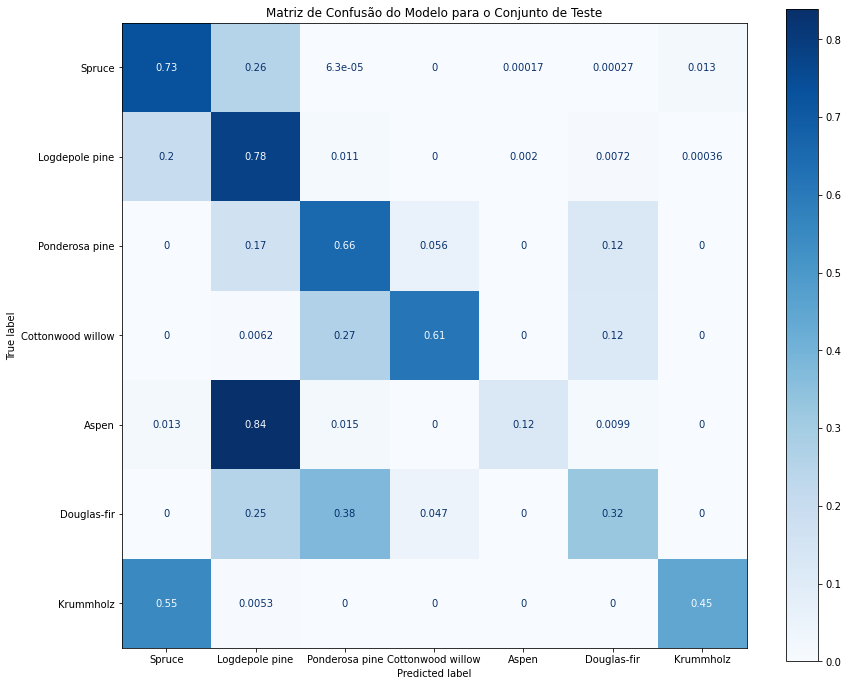

In [130]:
#6
scaler_x_test = StandardScaler()
x_test_transformed = scaler_x_test.fit_transform(x_test)
y_predict = neuralNetwork.predict(x_train_transformed)


print("Acurácia = %.4f " % accuracy_score(y_train, y_predict))
print("F-Score = %.4f" % f1_score(y_train, y_predict, average='macro'))
print("Revocação = %.4f" % recall_score(y_train, y_predict, average='macro'))
print("Precisão = %.4f" % precision_score(y_train, y_predict, average='macro', zero_division=0))
# argumento zero division, considera como 0, caso haja essa divisão, mas também pode ser jogado para 1,
# para 0, o valor fica baixo, indicando que há muitas ocorrencias disso, talvez devido ao desbalanceamento dos dados

fig, ax = plt.subplots(figsize=(14,12))
plot_confusion_matrix(neuralNetwork, x_test_transformed, y_test,
                           display_labels=["Spruce","Logdepole pine","Ponderosa pine","Cottonwood willow","Aspen","Douglas-fir","Krummholz"], 
                           cmap=plt.cm.Blues,
                           normalize="true", ax=ax)

plt.title("Matriz de Confusão do Modelo para o Conjunto de Teste")
plt.show()



In [139]:
#7
#optamos por rodar treinar apenas 15 vezes, visto que 100 vezes ficou inviável para a maquina que temos disponibilizado
#como fora recomendado, para fins de obter um resultado, treinaremos 15 vezes.

def training_neuralNetwork(optimizer):    
    neuralNetwork_100 = MLPClassifier(hidden_layer_sizes=(10), activation="relu", solver=optimizer, random_state=1, max_iter=300, learning_rate_init=0.01)
    accuracy_array = []
    f_score_array = []
    for i in range(15):
        x100_train, x100_test, y100_train, y100_test = train_test_split(x, y, test_size=0.3, shuffle=True)
        scaler100_x_train = StandardScaler()
        x100_train_transformed = scaler100_x_train.fit_transform(x100_train)
        neuralNetwork_100.fit(x100_train_transformed, y100_train)
        y100_predict = neuralNetwork.predict(x100_train_transformed)
        accuracy_array = np.insert(accuracy_array, i, accuracy_score(y100_train, y100_predict),axis=0)
        f_score_array = np.insert(f_score_array, i, f1_score(y100_train, y100_predict, average='macro'), axis=0)


    print("Média Acurácia = %.4f " % accuracy_array.mean())
    print("Desvio Padrão Acurácia = %.4f" % accuracy_array.std())
    print("Média F-Score = %.4f" % f_score_array.mean())
    print("Desvio Padrão F-Score = %.4f" % f_score_array.std())



In [140]:
# 7.1 e 7.2
optimizer_adam = training_neuralNetwork("adam")

Média Acurácia = 0.7177 
Desvio Padrão Acurácia = 0.0004
Média F-Score = 0.5403
Desvio Padrão F-Score = 0.0012


In [141]:
#8
optimizer_sgd = training_neuralNetwork("sgd")

Média Acurácia = 0.7180 
Desvio Padrão Acurácia = 0.0005
Média F-Score = 0.5404
Desvio Padrão F-Score = 0.0008


#### 9. 
Não há influência, significante em relação aos diferentes otimizadores, pois olhando-se tanto a média quanto o desvio das duas métricas, a diferença entre elas é pouquissima

## Discussão

Nos passos anteriores, você avaliou o desempenho de uma única rede neural que contém os seguintes parâmetros: uma única camada oculta com 10 neurônios e função de ativação ReLU. O otimizador utilizado, quer seja SGD ou ADAM, trata-se do algoritmo para aproximar o gradiente do erro. Neste sentido, a escolha do otimizador é um hiperparâmetro, pois diz respeito a como a rede neural definida previamente atuará "em tempo de execução"  durante o processo de treinamento. Também são hiperparâmetros a quantidade de épocas, a taxa de aprendizado inicial, dentre outros.

Cabe alientar também que você efetuou o treinamento desta rede por 100 vezes e apresentou os resultados em termos de média +- desvio padrão. Lembre-se que em uma rede neural há a inicialização aleatória de pesos e, em consequência, o desempenho delas está sujeito à uma flutuação estocástica. A execução destas múltiplas vezes faz com que eliminemos algum viés introduzido por uma boa ou má "sorte" na escolha de pesos no caso de uma única execução.

Você também aprendeu uma estratégia para escalonar os atributos para uma melhor convergência da rede. Utilize-a em todos os treinamentos e testes propostos a seguir.

## Propondo Novas Arquiteturas

Variando  os parâmetros (uma ou duas camadas ocultas, com diferente números de neurônios em cada uma delas e a função de ativação) e o hiperparâmetros solver (Adam ou SGD) e o número de épocas (100,150 e 200), atenda ao que se pede:

1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes
3. Como resultado da avaliação, apresente:  
    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn  

In [5]:
def train_rn_with_parameters(neural_network):    
    for i in range(15):
        x100_train, x100_test, y100_train, y100_test = train_test_split(x, y, test_size=0.3, shuffle=True)
        scaler100_x_train = StandardScaler()
        x100_train_transformed = scaler100_x_train.fit_transform(x100_train)
        neural_network.fit(x100_train_transformed, y100_train)
        y100_predict = neural_network.predict(x100_train_transformed)
    accuracy =  accuracy_score(y100_train, y100_predict)
    fscore =  f1_score(y100_train, y100_predict, average='macro')
    return [accuracy,fscore]



In [6]:
acc_array = []
fscore_array = []

rn1 = MLPClassifier(hidden_layer_sizes=(10, 10), activation="relu", solver='adam', random_state=1, max_iter=200, learning_rate_init=0.01)
rn1_result = train_rn_with_parameters(rn1)
acc_array.append(rn1_result[0])
fscore_array.append(rn1_result[1])

In [7]:
rn2 = MLPClassifier(hidden_layer_sizes=(10, 15), activation="relu", solver='adam', random_state=1, max_iter=150, learning_rate_init=0.01)
rn2_result = train_rn_with_parameters(rn2)
acc_array.append(rn2_result[0])
fscore_array.append(rn2_result[1])

In [8]:
rn3 = MLPClassifier(hidden_layer_sizes=(15), activation="logistic", solver='adam', random_state=1, max_iter=200, learning_rate_init=0.01)
rn3_result = train_rn_with_parameters(rn3)
acc_array.append(rn3_result[0])
fscore_array.append(rn3_result[1])

In [9]:
rn4 = MLPClassifier(hidden_layer_sizes=(15,15), activation="logistic", solver='adam', random_state=1, max_iter=100, learning_rate_init=0.01)
rn4_result = train_rn_with_parameters(rn4)
acc_array.append(rn4_result[0])
fscore_array.append(rn4_result[1])

C:\Users\Rafael\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Rafael\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Rafael\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Rafael\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Rafael\anaconda3\lib\site-packages\sklearn\neural_network\_

In [10]:
rn5 = MLPClassifier(hidden_layer_sizes=(5,10), activation="tanh", solver='adam', random_state=1, max_iter=150, learning_rate_init=0.01)
rn5_result = train_rn_with_parameters(rn5)
acc_array.append(rn5_result[0])
fscore_array.append(rn5_result[1])

In [11]:
rn6 = MLPClassifier(hidden_layer_sizes=(10), activation="relu", solver='sgd', random_state=1, max_iter=200, learning_rate_init=0.01)
rn6_result = train_rn_with_parameters(rn6)
acc_array.append(rn6_result[0])
fscore_array.append(rn6_result[1])

In [12]:
rn7 = MLPClassifier(hidden_layer_sizes=(10,15), activation="tanh", solver='sgd', random_state=1, max_iter=100, learning_rate_init=0.01)
rn7_result = train_rn_with_parameters(rn7)
acc_array.append(rn7_result[0])
fscore_array.append(rn7_result[1])

C:\Users\Rafael\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Rafael\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Rafael\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Rafael\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Rafael\anaconda3\lib\site-packages\sklearn\neural_network\_

In [13]:
rn8 = MLPClassifier(hidden_layer_sizes=(10,10), activation="identity", solver='sgd', random_state=1, max_iter=150, learning_rate_init=0.01)
rn8_result = train_rn_with_parameters(rn8)
acc_array.append(rn8_result[0])
fscore_array.append(rn8_result[1])

In [14]:
rn9 = MLPClassifier(hidden_layer_sizes=(10), activation="logistic", solver='sgd', random_state=1, max_iter=100, learning_rate_init=0.01)
rn9_result = train_rn_with_parameters(rn9)
acc_array.append(rn9_result[0])
fscore_array.append(rn9_result[1])

C:\Users\Rafael\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Rafael\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Rafael\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Rafael\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Rafael\anaconda3\lib\site-packages\sklearn\neural_network\_

In [15]:
rn10 = MLPClassifier(hidden_layer_sizes=(10, 15), activation="logistic", solver='sgd', random_state=1, max_iter=200, learning_rate_init=0.01)
rn10_result = train_rn_with_parameters(rn10)
acc_array.append(rn10_result[0])
fscore_array.append(rn10_result[1])

C:\Users\Rafael\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Rafael\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Rafael\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Rafael\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Rafael\anaconda3\lib\site-packages\sklearn\neural_network\_

In [17]:
print(acc_array, fscore_array)

[0.7660729565191735, 0.7779684687785832, 0.7877150191292033, 0.8086071579609941, 0.7369537850251285, 0.7557018794811019, 0.7861561611770607, 0.7217217266441771, 0.7739778907717576, 0.7879190967475437] [0.5757916249260686, 0.6343388426947852, 0.6547066421053724, 0.6792787893839198, 0.5293969540135824, 0.5884578522046032, 0.6496348531266285, 0.5296521871586021, 0.6059292328086021, 0.6444556218957481]


In [32]:
result_arr = []
for i in range(len(acc_array)):
    string_res = (f"Rede {i+1}: Acurácia={round(acc_array[i], 4)}, FScore={round(fscore_array[i], 4)} ")
    print(string_res)
    result_arr.append(string_res)


Rede 1: Acurácia=0.7661, FScore=0.5758 
Rede 2: Acurácia=0.778, FScore=0.6343 
Rede 3: Acurácia=0.7877, FScore=0.6547 
Rede 4: Acurácia=0.8086, FScore=0.6793 
Rede 5: Acurácia=0.737, FScore=0.5294 
Rede 6: Acurácia=0.7557, FScore=0.5885 
Rede 7: Acurácia=0.7862, FScore=0.6496 
Rede 8: Acurácia=0.7217, FScore=0.5297 
Rede 9: Acurácia=0.774, FScore=0.6059 
Rede 10: Acurácia=0.7879, FScore=0.6445 


In [73]:
ordered_acc_array = np.argsort(acc_array)
ordered_acc_array = np.flip(ordered_acc_array)[:3]
ordered_fscore_array = np.argsort(fscore_array)
ordered_fscore_array = np.flip(ordered_fscore_array)[:3]

print("Melhores em Acurácia:")
for i in range(0,3):
    print(f"Rede {ordered_acc_array[i]+1}: Acurácia: {acc_array[ordered_acc_array[i]]}")

print("\n")
print("Melhores em FScore:")
for i in range(0,3):
    print(f"Rede {ordered_fscore_array[i]+1}: FScore: {fscore_array[ordered_fscore_array[i]]}")

Melhores em Acurácia:
Rede 4: Acurácia: 0.8086071579609941
Rede 10: Acurácia: 0.7879190967475437
Rede 3: Acurácia: 0.7877150191292033


Melhores em FScore:
Rede 4: FScore: 0.6792787893839198
Rede 3: FScore: 0.6547066421053724
Rede 7: FScore: 0.6496348531266285


## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída. 

1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_o$.
2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.
3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia  

## Testando as Redes Neurais com Atributos Categóricos

1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)
2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 100 repetições  
    2.1 Considere o melhor otimizador para cada uma delas  
    2.2 Faça uso de 200 épocas para treinamento  
    2.2 Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura
3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante as 100 repetições

## Considerações Parciais

1. É possível identificar uma rede com desempenho superior às demais?
2. Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?
3. Considerar os atributos categóricos trouxe melhorias? Justifique.
4. Um número maior de épocas trouxe melhorias?
5. Qual a maior dificuldade de resolução do problema proposto perante as RNAs?